# Introduction to Machine Learning with TensorFlow

In [1]:
#conda install -c conda-forge tensorflow=1.0
# API guide is at https://www.tensorflow.org/api_guides/

## You might think of TensorFlow Core programs as consisting of two discrete sections:

<p>Building the computational graph.
<p>Running the computational graph.

In [2]:
import tensorflow as tf
sess = tf.InteractiveSession()

# Some tensor we want to print the value of
a = tf.constant([1.0, 3.0],name = "A")
b = a*3
hello = tf.constant('Hello, TensorFlow!')

print(a)
print(b)
#Explicitly call the shape function
print(a.get_shape())

#Execute the statements above
print(sess.run(a+a))
print(sess.run(a*2))
print(sess.run(a**2))
print(sess.run(b**2))
print(sess.run(hello))
# ANother way to do the same above
print((a*2).eval())

sess.close() # Because it is an interactive session we have to close it

Tensor("A:0", shape=(2,), dtype=float32)
Tensor("mul:0", shape=(2,), dtype=float32)
(2,)
[ 2.  6.]
[ 2.  6.]
[ 1.  9.]
[  9.  81.]
b'Hello, TensorFlow!'
[ 2.  6.]


In [3]:
3 # a rank 0 tensor; this is a scalar with shape []
[1. ,2., 3.] # a rank 1 tensor; this is a vector with shape [3]
[[1., 2., 3.], [4., 5., 6.]] # a rank 2 tensor; a matrix with shape [2, 3]

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

### Assign type

In [4]:
node1 = tf.constant(3.0, tf.float64) # contant values once assigned cannot be changed
node2 = tf.constant(4.0) # also tf.float32 implicitly
print(node1, node2)

Tensor("Const_1:0", shape=(), dtype=float64) Tensor("Const_2:0", shape=(), dtype=float32)


### Notice that printing the nodes does not output the values 3.0 and 4.0 as you might expect. Instead, they are nodes that, when evaluated, would produce 3.0 and 4.0, respectively. To actually evaluate the nodes, we must run the computational graph within a session. A session encapsulates the control and state of the TensorFlow runtime.

In [5]:
# Evaluate multiple values with one sess.run call
sess = tf.InteractiveSession()
print(sess.run([node1, node2]))
sess.close()

# Another way to create sessions

with tf.Session() as sess:
    print(sess.run([node1,node2]))

[3.0, 4.0]
[3.0, 4.0]


### Let us create our first real program, a linear model

In [6]:
# Reset the graph, used mostly when working in Jupyter notebook environments
tf.reset_default_graph()

#Tensorflow can be parameterized to accept external inputs, known as placeholders. A placeholder is a promise to 
#provide a value later.

sess = tf.InteractiveSession()
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b  # + provides a shortcut for tf.add(a, b)

#We can evaluate this graph with multiple inputs by using the feed_dict parameter to specify Tensors that provide 
#concrete values to these placeholders:
print("Add scalar a and b")
print(sess.run(adder_node, feed_dict={a: 3, b:4.5}))
print("Add vector a and b")
print(sess.run(adder_node, {a: [1,3], b: [2, 4]}))

# Let us make this a little more involved and add another operation
add_and_triple = adder_node * 3.
print("Add and multiply by 3")
print(sess.run(add_and_triple, {a: 3, b:4.5}))

#In machine learning we will typically want a model that can take arbitrary inputs, such as the one above. To make the 
#model trainable, we need to be able to modify the graph to get new outputs with the same input. Variables allow us to 
#add trainable parameters to a graph. They are constructed with a type and initial value:

W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

#Constants are initialized when you call tf.constant, and their value can never change. By contrast, variables are 
#not initialized when you call tf.Variable. To initialize all the variables in a TensorFlow program, you must explicitly 
#call a special operation as follows:

init = tf.global_variables_initializer()
sess.run(init)

#Since x is a placeholder, we can evaluate linear_model for several values of x simultaneously as follows:
print("Linear model results with vector inputs")
print(sess.run(linear_model, {x:[1,2,3,4]}))
print("Print the op for linear_model",linear_model.op)
#show_graph(add_and_triple)


Add scalar a and b
7.5
Add vector a and b
[ 3.  7.]
Add and multiply by 3
22.5
Linear model results with vector inputs
[ 0.          0.30000001  0.60000002  0.90000004]
Print the op for linear_model name: "add_1"
op: "Add"
input: "mul_1"
input: "Variable_1/read"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}



### Determine the error - L2 norm squared

In [7]:
# Let us determine the error now, given the correct values are in a variable or 'placeholder' y
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)
print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))

23.66


### Reassign values to variables W and b

In [8]:
# Now that is pretty high, so let us reassign the values for our parameters to W = -1 and b = 1
fixW = tf.assign(W, [-1.]) # used to reassign values to variables
fixb = tf.assign(b, [1.])
print(sess.run([fixW, fixb]))
print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))

[array([-1.], dtype=float32), array([ 1.], dtype=float32)]
0.0


### Given inputs and outputs, let us train our model to obtain weights and biases

In [9]:
# In the real world we don't have the answers, so now let us train this to find the right weights and biases
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
sess.run(init) # reset values to incorrect defaults.
# Iterate to find the minimum
for i in range(500):
  return_val = sess.run([train,W,b], {x:[1,2,3,4], y:[0,-1,-2,-3]})
  if(not(i%50)):
        print("Weights and biases in iteration ",i,return_val[1][0],return_val[2][0])   # Use this to see how the optimzer progresses

print("Final Weights and biases")
print(sess.run([W, b]))



Weights and biases in iteration  0 -0.22 -0.456
Weights and biases in iteration  50 -0.712702 0.155309
Weights and biases in iteration  100 -0.842705 0.537533
Weights and biases in iteration  150 -0.913881 0.7468
Weights and biases in iteration  200 -0.95285 0.861373
Weights and biases in iteration  250 -0.974185 0.924102
Weights and biases in iteration  300 -0.985867 0.958446
Weights and biases in iteration  350 -0.992262 0.977249
Weights and biases in iteration  400 -0.995763 0.987544
Weights and biases in iteration  450 -0.99768 0.99318
Final Weights and biases
[array([-0.99871475], dtype=float32), array([ 0.99622124], dtype=float32)]


### Let us summarize the code for a linear regression model here

In [10]:
#To summarize and evaluate accuracy
import numpy as np
import tensorflow as tf

# Model parameters
W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)
# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
# training data
x_train = [1,2,3,4]
y_train = [0,-1,-2,-3]
# training loop
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init) # reset values to wrong
for i in range(1000):
    return_val = sess.run([train,W,b], {x:x_train, y:y_train})
    if(not(i%50)):
        print("Weights and biases in iteration ",i,return_val[1][0],return_val[2][0])   # Use this to see how the optimzer progresses

# evaluate training accuracy
curr_W, curr_b, curr_loss  = sess.run([W, b, loss], {x:x_train, y:y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

Weights and biases in iteration  0 -0.22 -0.456
Weights and biases in iteration  50 -0.712702 0.155309
Weights and biases in iteration  100 -0.842705 0.537533
Weights and biases in iteration  150 -0.913881 0.7468
Weights and biases in iteration  200 -0.95285 0.861373
Weights and biases in iteration  250 -0.974185 0.924102
Weights and biases in iteration  300 -0.985867 0.958446
Weights and biases in iteration  350 -0.992262 0.977249
Weights and biases in iteration  400 -0.995763 0.987544
Weights and biases in iteration  450 -0.99768 0.99318
Weights and biases in iteration  500 -0.99873 0.996266
Weights and biases in iteration  550 -0.999305 0.997956
Weights and biases in iteration  600 -0.999619 0.998881
Weights and biases in iteration  650 -0.999792 0.999387
Weights and biases in iteration  700 -0.999886 0.999665
Weights and biases in iteration  750 -0.999938 0.999816
Weights and biases in iteration  800 -0.999966 0.999899
Weights and biases in iteration  850 -0.999981 0.999945
Weights

### Let us see tf.contrib.learn makes all of this a lot easier (Older way). Estimators allow you to work at a higher level, without having to deal with sessions.

In [11]:
import tensorflow as tf
# NumPy is often used to load, manipulate and preprocess data.
import numpy as np

# Declare list of features. We only have one real-valued feature. There are many
# other types of columns that are more complicated and useful.
features = [tf.contrib.layers.real_valued_column("x", dimension=1)]

# An estimator is the front end to invoke training (fitting) and evaluation
# (inference). There are many predefined types like linear regression,
# logistic regression, linear classification, logistic classification, and
# many neural network classifiers and regressors. The following code
# provides an estimator that does linear regression.
estimator = tf.contrib.learn.LinearRegressor(feature_columns=features)

# TensorFlow provides many helper methods to read and set up data sets.
# Here we use `numpy_input_fn`. We have to tell the function how many batches
# of data (num_epochs) we want and how big each batch should be.
x = np.array([1., 2., 3., 4.])
y = np.array([0., -1., -2., -3.])
input_fn = tf.contrib.learn.io.numpy_input_fn({"x":x}, y, batch_size=4,
                                              num_epochs=1000)

# We can invoke 1000 training steps by invoking the `fit` method and passing the
# training data set.
estimator.fit(input_fn=input_fn, steps=1000)

# Here we evaluate how well our model did. In a real example, we would want
# to use a separate validation and testing data set to avoid overfitting.
estimator.evaluate(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a1fb52748>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/qh/fr09lp897f7360g0yvw8dsl40000gn/T/tmp9dvbw1p5'}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of ta

{'global_step': 1000, 'loss': 2.8938343e-08}

In [12]:
#print(help(estimator))
print(estimator.get_variable_names())
print(estimator.get_variable_value('linear/x/weight'))
print(estimator.get_variable_value('linear/bias_weight'))



['global_step', 'linear/bias_weight', 'linear/bias_weight/ear/bias_weight/part_0/Ftrl', 'linear/bias_weight/ear/bias_weight/part_0/Ftrl_1', 'linear/x/weight', 'linear/x/weight/linear/x/weight/part_0/Ftrl', 'linear/x/weight/linear/x/weight/part_0/Ftrl_1']
[[-0.99987441]]
[ 0.99959004]


### New way using tf.estimator

In [13]:
import tensorflow as tf
# NumPy is often used to load, manipulate and preprocess data.
import numpy as np

# Declare list of features. We only have one real-valued feature. There are many
# other types of columns that are more complicated and useful.

# Info on feature columns at https://www.tensorflow.org/guide/feature_columns
features = [tf.feature_column.numeric_column(key="x")]

# An estimator is the front end to invoke training (fitting) and evaluation
# (inference). There are many predefined types like linear regression,
# logistic regression, linear classification, logistic classification, and
# many neural network classifiers and regressors. The following code
# provides an estimator that does linear regression.
model = tf.estimator.LinearRegressor(feature_columns=features)


# Define an input data feeder function, the same can be done for test data as well
# More info here https://www.tensorflow.org/guide/premade_estimators#create_input_functions
def input_fn():
    features = {'x': np.array([1., 2., 3., 4.])}
    labels = np.array([0., -1., -2., -3.])
    return features, labels

#input_fn = tf.contrib.learn.io.numpy_input_fn({"x":x}, y, batch_size=4,
#                                              num_epochs=1000)

# We can invoke 1000 training steps by invoking the `fit` method and passing the
# training data set.
model.train(input_fn=input_fn, steps=1000)

# Here we evaluate how well our model did. In a real example, we would want
# to use a separate validation and testing data set to avoid overfitting.
eval_result = model.evaluate(input_fn=input_fn,steps=1) # Evaluate 'steps' batches of data, in this case that is 1
print("Result is ",eval_result)


# Newer versions of tensorflow have access to variables using get_variable_names and get_variable_value

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/qh/fr09lp897f7360g0yvw8dsl40000gn/T/tmp1gh91_oc', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/qh/fr09lp897f7360g0yvw8dsl40000gn/T/tmp1gh91_oc/model.ckpt.
INFO:tensorflow:loss = 14.0, step = 1
INFO:tensorflow:global_step/sec: 1238.97
INFO:tensorflow:loss = 0.13438, step = 101 (0.082 sec)
INFO:tensorflow:global_step/sec: 1578.44
INFO:tensorflow:loss = 0.0124377, step = 201 (0.063 sec)
INFO:tensorflow:global_step/sec: 1572.64
INFO:tensorflow:loss = 0.00116163, step = 301 (0.064 sec)
INFO:tensorflow:global_step/sec: 1515.62
INFO:tensorflow:loss = 0.000108581, step = 401 (0.066 sec)
INFO:tensorflow:global

## Let us look at the Iris dataset and train a Neural Network on it. This has 4 features per observation and 3 potential classes for each observation.

In [14]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
from urllib.request import urlopen

import tensorflow as tf
import numpy as np

IRIS_TRAINING = "iris_training.csv"
IRIS_TRAINING_URL = "http://download.tensorflow.org/data/iris_training.csv"

IRIS_TEST = "iris_test.csv"
IRIS_TEST_URL = "http://download.tensorflow.org/data/iris_test.csv"

!wget http://download.tensorflow.org/data/iris_training.csv
!wget http://download.tensorflow.org/data/iris_test.csv

![title](https://www.tensorflow.org/images/iris_three_species.jpg)

In [15]:
# Skip the download part since I already have it available locally
training_set = tf.contrib.learn.datasets.base.load_csv_with_header(
    filename='iris_training.csv',
    target_dtype=np.int,
    features_dtype=np.float32)
test_set = tf.contrib.learn.datasets.base.load_csv_with_header(
    filename='iris_training.csv',
    target_dtype=np.int,
    features_dtype=np.float32)

In [16]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import urllib

import numpy as np
import tensorflow as tf

# Data sets
IRIS_TRAINING = "iris_training.csv"
IRIS_TRAINING_URL = "http://download.tensorflow.org/data/iris_training.csv"

IRIS_TEST = "iris_training.csv"
IRIS_TEST_URL = "http://download.tensorflow.org/data/iris_test.csv"

def main():
  
  
  # Load datasets.
  training_set = tf.contrib.learn.datasets.base.load_csv_with_header(
      filename=IRIS_TRAINING,
      target_dtype=np.int,
      features_dtype=np.float32)
  test_set = tf.contrib.learn.datasets.base.load_csv_with_header(
      filename=IRIS_TEST,
      target_dtype=np.int,
      features_dtype=np.float32)

  # Specify that all features have real-value data
  feature_columns = [tf.feature_column.numeric_column("x", shape=[4])]

  # Configure behavior for logging - see here https://www.tensorflow.org/versions/r1.3/api_docs/python/tf/estimator/RunConfig
  config = tf.estimator.RunConfig()
  config = config.replace(save_checkpoints_steps = 300, log_step_count_steps = 50, save_summary_steps = 50)
    
  # Build 3 layer DNN with 10, 20, 10 units respectively.
  classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                          hidden_units=[10, 20, 10],
                                          n_classes=3,
                                          config = config,               # configuration
                                          optimizer=tf.train.ProximalAdagradOptimizer( #optimizer
                                           learning_rate=0.1,
                                           l1_regularization_strength=0.001
                                          ),
                                          activation_fn=tf.nn.relu,   #activation function
                                          model_dir="/tmp/iris_model")

  # You should delete this folder before you start if you don't want the model to restart from the saved state.
  
  os.system('rm -rf /tmp/iris_model')

  # Define the training inputs, another way to feed the data
  train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": np.array(training_set.data)},
      y=np.array(training_set.target),
      num_epochs=None,
      shuffle=True)


  # Train model.
  classifier.train(input_fn=train_input_fn, steps=2000)

  # Define the test inputs
  test_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": np.array(test_set.data)},
      y=np.array(test_set.target),
      num_epochs=1,
      shuffle=False)

  # Evaluate accuracy.
  accuracy_score = classifier.evaluate(input_fn=test_input_fn)["accuracy"]

  print("\nTest Accuracy: {0:f}\n".format(accuracy_score))

  # What about predictions? Classify two new flower samples.
  new_samples = np.array(
      [[6.4, 3.2, 4.5, 1.5],
       [5.8, 3.1, 5.0, 1.7]], dtype=np.float32)
    
  predict_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": new_samples},
      num_epochs=1,
      shuffle=False)

  predictions = list(classifier.predict(input_fn=predict_input_fn))
  predicted_classes = [p["classes"] for p in predictions]

  print(
      "New Samples, Class Predictions:    {}\n"
      .format(predicted_classes))

if __name__ == "__main__":
    main()

INFO:tensorflow:Using config: {'_model_dir': '/tmp/iris_model', '_tf_random_seed': 1, '_save_summary_steps': 50, '_save_checkpoints_secs': None, '_save_checkpoints_steps': 300, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 50}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/iris_model/model.ckpt.
INFO:tensorflow:loss = 303.975, step = 1
INFO:tensorflow:global_step/sec: 583.343
INFO:tensorflow:global_step/sec: 825.338
INFO:tensorflow:loss = 9.06935, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 782.817
INFO:tensorflow:global_step/sec: 775.64
INFO:tensorflow:loss = 13.2485, step = 201 (0.128 sec)
INFO:tensorflow:global_step/sec: 750.919
INFO:tensorflow:Saving checkpoints for 301 into /tmp/iris_model/model.ckpt.
INFO:tensorflow:global_step/sec: 461.59
INFO:tensorflow:loss = 9.514, step = 301 (0.175 sec)
INFO:tensorflow:global_step/sec: 813.077
INFO:tensorflow:gl

## MNIST digits classification

MNIST is a simple computer vision dataset. It consists of images of handwritten digits like these:

![title](https://www.tensorflow.org/images/MNIST.png)

It also includes labels for each image, telling us which digit it is.

<p>Learn about the MNIST data and softmax regressions
<p>Create a function that is a model for recognizing digits, based on looking at every pixel in the image
<p>Use TensorFlow to train the model to recognize digits by having it "look" at thousands of examples (and run our first TensorFlow session to do so)
<p>Check the model's accuracy with our test data

The MNIST Data

The MNIST data is split into three parts: 55,000 data points of training data (mnist.train), 10,000 points of test data (mnist.test), and 5,000 points of validation data (mnist.validation). This split is very important: it's essential in machine learning that we have separate data which we don't learn from so that we can make sure that what we've learned actually generalizes!

![title](https://www.tensorflow.org/images/mnist-train-xs.png)

As mentioned earlier, every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. We'll call the images "x" and the labels "y". Both the training set and test set contain images and their corresponding labels; for example the training images are mnist.train.images and the training labels are mnist.train.labels.

Each image is 28 pixels by 28 pixels. We can interpret this as a big array of numbers:

We can flatten this array into a vector of 28x28 = 784 numbers. It doesn't matter how we flatten the array, as long as we're consistent between images. From this perspective, the MNIST images are just a bunch of points in a 784-dimensional vector space, with a very rich structure.

Flattening the data throws away information about the 2D structure of the image. Isn't that bad? Well, the best computer vision methods do exploit this structure, and we will in later tutorials. But the simple method we will be using here, a softmax regression (defined below), won't.

The result is that mnist.train.images is a tensor (an n-dimensional array) with a shape of [55000, 784]. The first dimension is an index into the list of images and the second dimension is the index for each pixel in each image. Each entry in the tensor is a pixel intensity between 0 and 1, for a particular pixel in a particular image.


Each image in MNIST has a corresponding label, a number between 0 and 9 representing the digit drawn in the image.

For the purposes of this tutorial, we're going to want our labels as "one-hot vectors". A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the nth digit will be represented as a vector which is 1 in the nth dimension. For example, 3 would be [0,0,0,1,0,0,0,0,0,0]. Consequently, mnist.train.labels is a [55000, 10] array of floats.

![title](https://www.tensorflow.org/images/softmax-regression-vectorequation.png)

## Cross entropy cost function

Because of the shape of the sigmoid function, extreme values as inputs to the sigmoid function tend to result in smaller partial derivatives for that cost function. This results in slower learning when the inputs are really far away from zero if the objective is to bring the cost function to zero.

It turns out that we can solve the problem by replacing the quadratic cost with a different cost function, known as the cross-entropy.

For a simple neural network output given by 'a'

$a = sigma(z)$

where 

$z = w*x + b$

Let the desired output be y, then the Cross entropy cost is given by

$cost = y*ln(a) + (1-y)*ln(1 -a)$

This satisfies all the properties of a cost function: when y = 1 and a close to 1, cost = 0
and when y = 0 and a is close to 0, cost = 0

Partial derivative of this cost is given by  $x * (sigma(z) - y)$
This is great because now the learning rate is proportional to (a - y), so the farther a is from y, the larger the gradient.

See here for details http://neuralnetworksanddeeplearning.com/chap3.html

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz
Cross entropy at step  0  =  2.30259
Cross entropy at step  100  =  0.633378
Cross entropy at step  200  =  0.639661
Cross entropy at step  300  =  0.326474
Cross entropy at step  400  =  0.372144
Cross entropy at step  500  =  0.375368
Cross entropy at step  600  =  0.489319
Cross entropy at step  700  =  0.262653
Cross entropy at step  800  =  0.441976
Cross entropy at step  900  =  0.244338
Cross entropy at step  999  =  0.186102
Accuracy is
0.9187


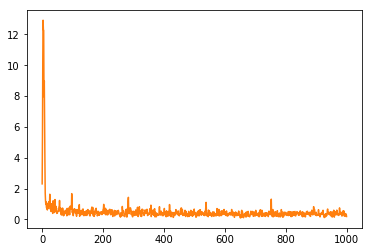

In [17]:
%matplotlib inline
"""A very simple MNIST classifier.

See extensive documentation at
https://www.tensorflow.org/get_started/mnist/beginners
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data
from bokeh.plotting import figure, output_notebook, show
import matplotlib.pyplot as plt


import tensorflow as tf

FLAGS = None



# Import data
mnist = input_data.read_data_sets('/tmp/tensorflow/mnist/input_data', one_hot=True)
#mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)

# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

# The raw formulation of cross-entropy,
#
#   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
#
# can be numerically unstable.
#
# So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
# outputs of 'y', and then average across the batch.
cross_entropy = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
#train_step = tf.train.GradientDescentOptimizer(0.8).minimize(cross_entropy)
train_step = tf.train.AdagradOptimizer(0.8).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
steps = 1000
cross_entropy_array = []
accuracy_array = []
ACCURACY_DURING_TRAINING = 0

# Train
for i in range(steps):
    batch_xs, batch_ys = mnist.train.next_batch(100) # batch_xs is input and batch_ys is the corresponding classifier 
    #result
    cross_ent = sess.run([train_step,cross_entropy], feed_dict={x: batch_xs, y_: batch_ys})
    cross_entropy_array.append(cross_ent)
    #print(cross_ent)
    # Print out accuracy as we train
    if(ACCURACY_DURING_TRAINING):
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        accuracy_array.append(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y_: mnist.test.labels}))
    if(i%100 == 0):
        if(ACCURACY_DURING_TRAINING):
            print("Accuracy at step ",i," = ",accuracy_array[i])
        print("Cross entropy at step ",i," = ",cross_entropy_array[i][1])
    
print("Cross entropy at step ",i," = ",cross_entropy_array[i][1])    

# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy is")
print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y_: mnist.test.labels}))

#Plot the training accuracy and cross_entropy
plt.plot(np.arange(0,steps),cross_entropy_array)
if(ACCURACY_DURING_TRAINING):
    plt.plot(np.arange(0,steps),accuracy_array)

sess.close()

### Same example with Gradient Descent Optimizer 

Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz
Cross entropy at step  0  =  2.30259
Cross entropy at step  100  =  0.534261
Cross entropy at step  200  =  0.364402
Cross entropy at step  300  =  0.270909
Cross entropy at step  400  =  0.294025
Cross entropy at step  500  =  0.321305
Cross entropy at step  600  =  0.320606
Cross entropy at step  700  =  0.449078
Cross entropy at step  800  =  0.354322
Cross entropy at step  900  =  0.313897
Cross entropy at step  999  =  0.398348
Accuracy is
0.9141


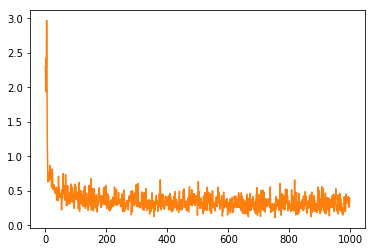

In [20]:
%matplotlib inline
"""A very simple MNIST classifier.

See extensive documentation at
https://www.tensorflow.org/get_started/mnist/beginners
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data
from bokeh.plotting import figure, output_notebook, show
import matplotlib.pyplot as plt


import tensorflow as tf

FLAGS = None



# Import data
mnist = input_data.read_data_sets('/tmp/tensorflow/mnist/input_data', one_hot=True)
#mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)

# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

# The raw formulation of cross-entropy,
#
#   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
#
# can be numerically unstable.
#
# So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
# outputs of 'y', and then average across the batch.
cross_entropy = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.8).minimize(cross_entropy)
#train_step = tf.train.AdagradOptimizer(0.8).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
steps = 1000
cross_entropy_array = []
accuracy_array = []
ACCURACY_DURING_TRAINING = 0

# Train
for i in range(steps):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    cross_ent = sess.run([train_step,cross_entropy], feed_dict={x: batch_xs, y_: batch_ys})
    cross_entropy_array.append(cross_ent)
    #print(cross_ent)
    # Print out accuracy as we train
    if(ACCURACY_DURING_TRAINING):
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        accuracy_array.append(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y_: mnist.test.labels}))
    if(i%100 == 0):
        if(ACCURACY_DURING_TRAINING):
            print("Accuracy at step ",i," = ",accuracy_array[i])
        print("Cross entropy at step ",i," = ",cross_entropy_array[i][1])
    
print("Cross entropy at step ",i," = ",cross_entropy_array[i][1])

# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy is")
print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y_: mnist.test.labels}))

#Plot the training accuracy and cross_entropy
plt.plot(np.arange(0,steps),cross_entropy_array)
if(ACCURACY_DURING_TRAINING):
    plt.plot(np.arange(0,steps),accuracy_array)
    

sess.close()

In [19]:
tf.__version__

'1.3.0'